In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
data.shape

(150, 5)

### data cleaning and Data preprocessing

<Axes: xlabel='species', ylabel='count'>

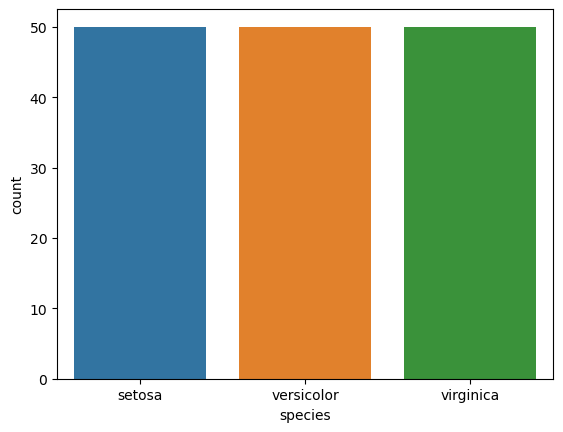

In [5]:
sns.countplot(x = data['species'])

In [6]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

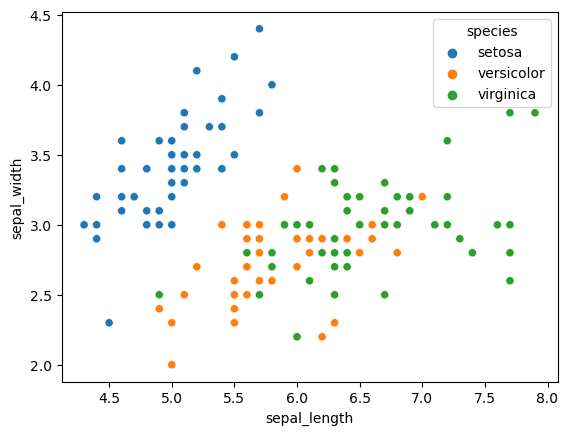

In [7]:
sns.scatterplot(x = data['sepal_length'], y = data['sepal_width'], hue = data['species'])

<Axes: xlabel='petal_length', ylabel='petal_width'>

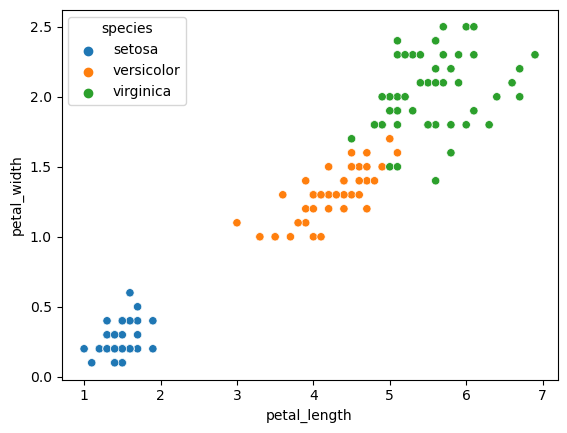

In [8]:
sns.scatterplot(x = data['petal_length'], y = data['petal_width'], hue = data['species'])

In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Seperate X and y

In [12]:
X = data.drop('species', axis = 1)
y = data['species']

## Split the data into train set and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## apply decision tree on train set

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()  ## By default the gini index is applied on the data
dtc

DecisionTreeClassifier()

In [15]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Perform prediction on X_test

In [17]:
y_pred = dtc.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [18]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


## Accuracy Check

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9736842105263158

[Text(0.4, 0.9, 'petal_width <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'petal_length <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'petal_width <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'sepal_width <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'petal_length <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'sepal_width <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

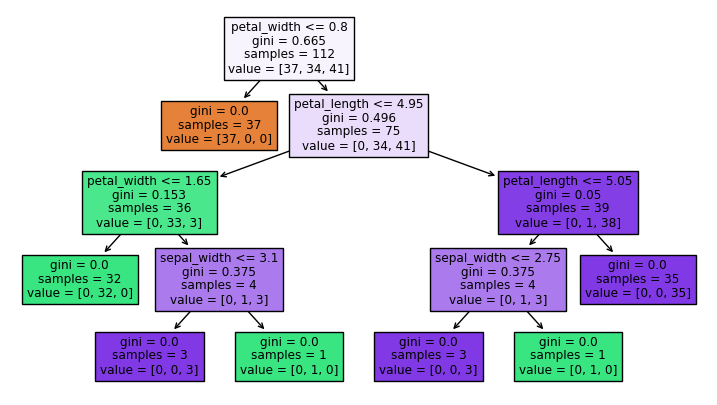

In [30]:
fig = plt.figure(figsize = (9,5))

from sklearn.tree import plot_tree
plot_tree(dtc, feature_names = X.columns,filled = True)

## max_depth parameter of decision tree algorithm

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 2)
dtc

DecisionTreeClassifier(max_depth=2)

In [44]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [45]:
y_pred = dtc.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

[Text(0.4, 0.8333333333333334, 'petal_length <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.5, 'petal_length <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

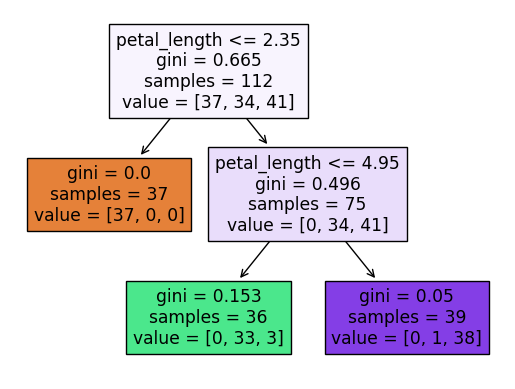

In [46]:
from sklearn.tree import plot_tree
plot_tree(dtc, feature_names = X.columns, filled = True)